# Catalogs

A notebook to test Catalogs modules

### Imports

In [1]:
from Catalogs import *
import os
import numpy as np
import matplotlib
%matplotlib inline

### Configuration

In [2]:
data_path = '/home/lmaurin/Work/PF_MER/data/20200116_validation_elie/SC456_for_Loic'
tiles = np.arange(50010,50019)

### Analysis

Iterate over tiles, get the output MER catalog, the TU catalog and merge them all

In [3]:
MER = None
TU = None


for tile in tiles:
    # Get MER catalog
    filename_MER = os.path.join( data_path, 'cat{}.fits'.format(tile))
    if MER is None:
        MER = MERCatalog.from_file(filename_MER, extract_coords=False)
    else:
        subMER = MERCatalog.from_file(filename_MER, extract_coords=False)
        MER.append( subMER )

    # GET TU catalog
    filename_TU_gal = os.path.join(data_path, 'mntu_galaxy_catalog_v24_tile{}.fits'.format(tile))
    TU_gal = TrueUniverseCatalog.from_file(filename_TU_gal)

    filename_TU_star = os.path.join(data_path, 'mntu_star_catalog_v8_tile{}.fits'.format(tile))
    TU_star = TrueUniverseCatalog.from_file(filename_TU_star, fix_coords=False)


    if TU is None:
        TU = merge_star_gal(TU_star, TU_gal)
    else:
        TU.append( merge_star_gal(TU_star, TU_gal) )

MCat = MatchedCatalog.from_catalogs(MER, TU, cat_names=['MER','TU'])

### Plots
Make some descriptive plots.

#### Star galaxy separation plot:

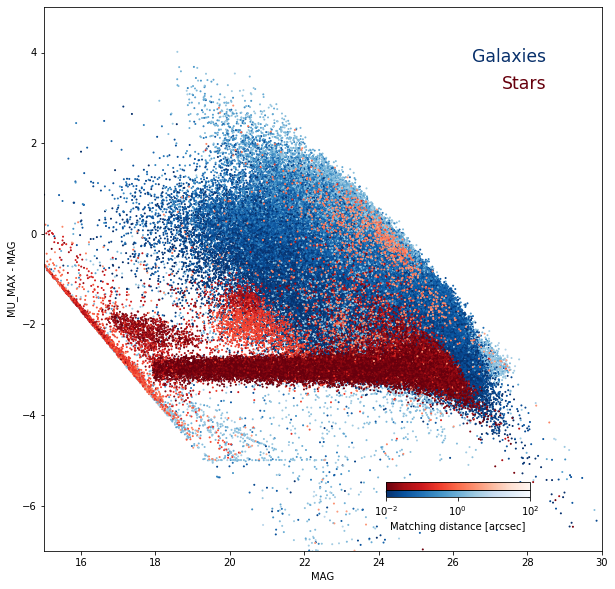

In [4]:
plot_tools.plot_mu_mag(MCat)

#### Spatiale distribution of the objects:

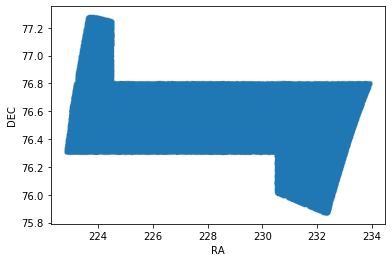

In [5]:
plot_tools.plot_coords(MER)

##### MER vs TU fluxes:
* VIS:

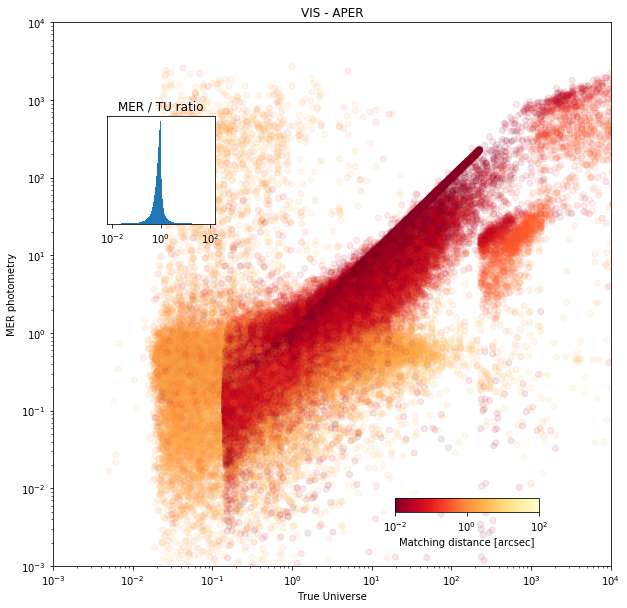

In [6]:
plot_tools.scatterplot_flux_MER_TU(MCat, 'VIS')

* NIR-Y:

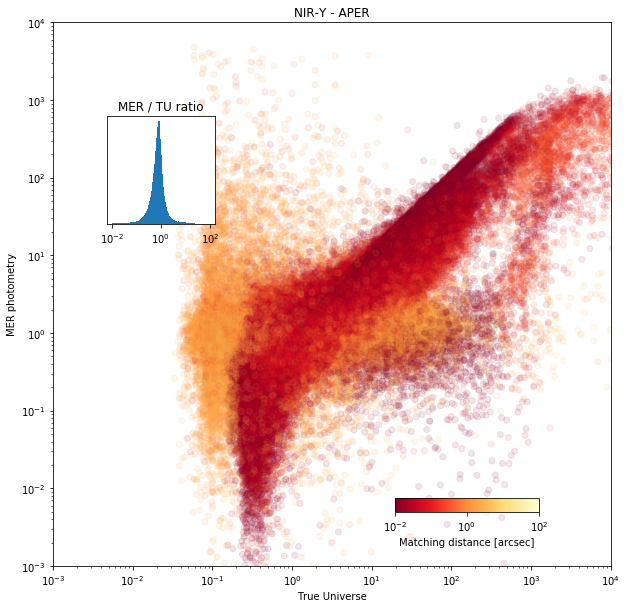

In [7]:
plot_tools.scatterplot_flux_MER_TU(MCat, 'NIR-Y')

* NIR-J:

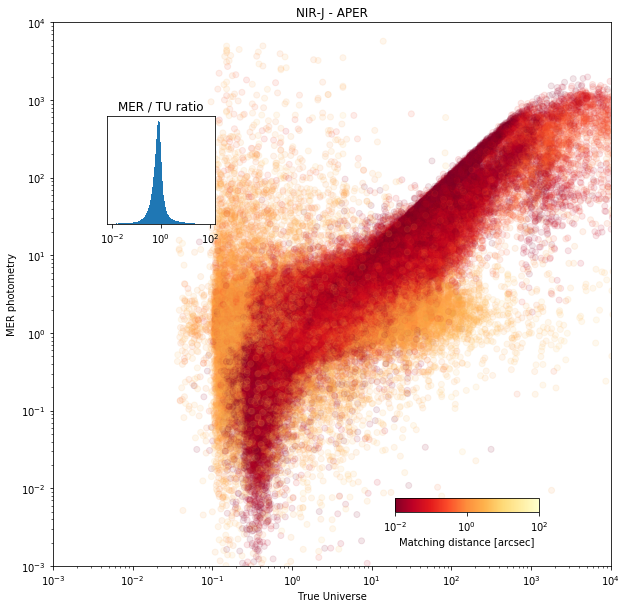

In [8]:
plot_tools.scatterplot_flux_MER_TU(MCat, 'NIR-J')

* NIR-H

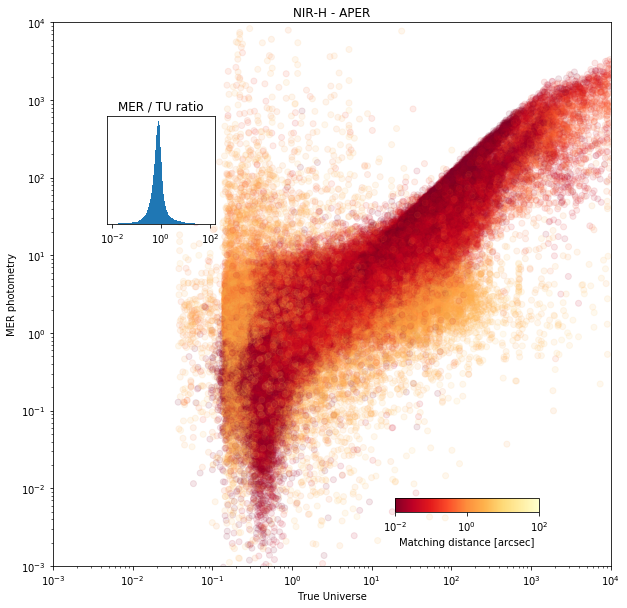

In [9]:
plot_tools.scatterplot_flux_MER_TU(MCat, 'NIR-H')

